In [63]:
%load_ext autoreload
%autoreload 2
%cd ../..

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/


In [64]:
import torch
import utils.data_loader as data_loader
import MLP.MLP as MLP
import MLP.train as train 
import matplotlib.pyplot as plt

In [65]:
X_train, y_train, X_val, y_val = data_loader.get_train_and_validation_set()
X_test, labels_test = data_loader.get_test_data()
train_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)),
    batch_size=64, shuffle=True )
val_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long)),
    batch_size=64, shuffle=False )
test_loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(labels_test, dtype=torch.long)),
    batch_size=64, shuffle=False ) 
param_grid = {
    "hidden_size": [128,256],
    "batch_size": [32],
    "optimizer": ["SGD"],
    "learning_rate": [0.1, 0.01, 0.001]
}

best_params, best_val_acc = train.grid_search(MLP.MLP, train_loader, val_loader, param_grid, epochs=5)
print(f"\nBest hyperparameters: {best_params} with validation accuracy: {best_val_acc:.4f}")



Testing config: {'hidden_size': 128, 'batch_size': 32, 'optimizer': 'SGD', 'learning_rate': 0.1}
Epoch 1/5 | Train Loss: 0.4832 | Train Acc: 0.8713 | Val Loss: 0.2915 | Val Acc: 0.9155
Epoch 2/5 | Train Loss: 0.2460 | Train Acc: 0.9292 | Val Loss: 0.2248 | Val Acc: 0.9377
Epoch 3/5 | Train Loss: 0.1882 | Train Acc: 0.9456 | Val Loss: 0.1798 | Val Acc: 0.9488
Epoch 4/5 | Train Loss: 0.1511 | Train Acc: 0.9570 | Val Loss: 0.1570 | Val Acc: 0.9549
Epoch 5/5 | Train Loss: 0.1261 | Train Acc: 0.9633 | Val Loss: 0.1360 | Val Acc: 0.9602

Testing config: {'hidden_size': 128, 'batch_size': 32, 'optimizer': 'SGD', 'learning_rate': 0.01}
Epoch 1/5 | Train Loss: 1.3660 | Train Acc: 0.7152 | Val Loss: 0.7036 | Val Acc: 0.8480
Epoch 2/5 | Train Loss: 0.5545 | Train Acc: 0.8661 | Val Loss: 0.4675 | Val Acc: 0.8795
Epoch 3/5 | Train Loss: 0.4260 | Train Acc: 0.8859 | Val Loss: 0.3987 | Val Acc: 0.8915
Epoch 4/5 | Train Loss: 0.3771 | Train Acc: 0.8958 | Val Loss: 0.3652 | Val Acc: 0.8986
Epoch 5/5 |

In [66]:
best_params

{'hidden_size': 256,
 'batch_size': 32,
 'optimizer': 'SGD',
 'learning_rate': 0.1}

In [67]:
best_model = MLP.MLP(input_size=784, hidden_size=best_params["hidden_size"], output_size=10)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(best_model.parameters(), lr=best_params["learning_rate"])
history_best_model = train.train_model(best_model, train_loader, val_loader, criterion, optimizer, epochs=10)
avg_loss, test_acc = train.evaluate_model(best_model, test_loader, criterion)
print(f"Test accuracy with best hyperparameters: {test_acc}")

Epoch 1/10 | Train Loss: 0.4744 | Train Acc: 0.8750 | Val Loss: 0.2847 | Val Acc: 0.9158
Epoch 2/10 | Train Loss: 0.2425 | Train Acc: 0.9311 | Val Loss: 0.2168 | Val Acc: 0.9397
Epoch 3/10 | Train Loss: 0.1848 | Train Acc: 0.9470 | Val Loss: 0.1788 | Val Acc: 0.9488
Epoch 4/10 | Train Loss: 0.1485 | Train Acc: 0.9583 | Val Loss: 0.1556 | Val Acc: 0.9574
Epoch 5/10 | Train Loss: 0.1233 | Train Acc: 0.9651 | Val Loss: 0.1372 | Val Acc: 0.9608
Epoch 6/10 | Train Loss: 0.1056 | Train Acc: 0.9698 | Val Loss: 0.1249 | Val Acc: 0.9637
Epoch 7/10 | Train Loss: 0.0916 | Train Acc: 0.9749 | Val Loss: 0.1159 | Val Acc: 0.9667
Epoch 8/10 | Train Loss: 0.0807 | Train Acc: 0.9773 | Val Loss: 0.1079 | Val Acc: 0.9679
Epoch 9/10 | Train Loss: 0.0720 | Train Acc: 0.9803 | Val Loss: 0.1023 | Val Acc: 0.9706
Epoch 10/10 | Train Loss: 0.0647 | Train Acc: 0.9825 | Val Loss: 0.1011 | Val Acc: 0.9711
Test accuracy with best hyperparameters: 0.9733


In [81]:
train_los = history_best_model["train_loss"]
len(train_los)

10

In [69]:
test_acc

0.9733

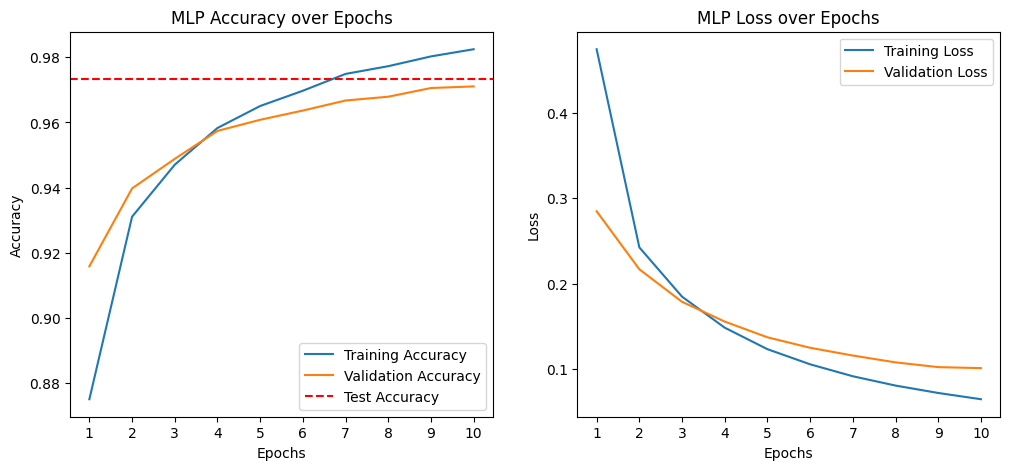

In [ ]:
# plot training and validation accuracy and loss over epochs and integrate final tett accuracy as dotted red line

epochs = range(1, 11)  # epochs 1 through 10

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, history_best_model['train_acc'], label='Training Accuracy')
plt.plot(epochs, history_best_model['val_acc'], label='Validation Accuracy')
plt.axhline(y=test_acc, color='r', linestyle='--', label='Test Accuracy')
plt.title('MLP Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)  # optional: show integer ticks from 1 to 10
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, history_best_model['train_loss'], label='Training Loss')
plt.plot(epochs, history_best_model['val_loss'], label='Validation Loss')
plt.title('MLP Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.savefig("./results/MLP_result.png")
plt.show()

